# Import data from yfinance API for a specific ticker

In [1]:
import yfinance as yf
import datetime as dt

# Define the ticker symbol
tickerSymbol = 'F'

# Get data for this ticker
tickerData = yf.Ticker(tickerSymbol)

# define start and today 
start = dt.date.today() - dt.timedelta(days=365)
today = dt.date.today()

# Get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start=start, end=today)

# See your data
tickerDf.tail(2)


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-06-14 00:00:00-04:00,14.25,14.45,13.97,14.20,69748500,0.0,0.0
2023-06-15 00:00:00-04:00,14.12,14.50,14.12,14.45,61463400,0.0,0.0


In [2]:
import numpy as np

# Reset the index
df = tickerDf.reset_index()

# Calculate daily returns
df['Return'] = df['Close'].pct_change()

In [3]:
# Calculate volatilities
trading_days_in_a_year = 252
trading_days_60 = 60
trading_days_30 = 30

annualized_volatility = df['Return'].std() * np.sqrt(trading_days_in_a_year)
sixty_day_volatility = df['Return'].rolling(window=trading_days_60).std().dropna().iloc[-1] * np.sqrt(trading_days_60)
thirty_day_volatility = df['Return'].rolling(window=trading_days_30).std().dropna().iloc[-1] * np.sqrt(trading_days_30)

# Volatility Classification
volatility_classification = 'High' if annualized_volatility >= 0.5 else 'Low'

print(f"Annualized Volatility: {annualized_volatility}")
print(f"60 Day Volatility: {sixty_day_volatility}")
print(f"30 Day Volatility: {thirty_day_volatility}")
print(f"Volatility Classification: {volatility_classification}")

Annualized Volatility: 0.4159880566880184
60 Day Volatility: 0.17010169960940172
30 Day Volatility: 0.13224867226849474
Volatility Classification: Low


In [4]:
# Prepare the strategies dictionary
strategies = {
    'Bull Put Spread': {'sentiment': 'Bull', 'volatility': 'High'},
    'Short Put': {'sentiment': 'Bull', 'volatility': 'High'},
    'Put Broken Wing Butterfly': {'sentiment': 'Bull', 'volatility': 'High'},
    'Custom Naked Put': {'sentiment': 'Bull', 'volatility': 'High'},
    'Bull Call Spread': {'sentiment': 'Bull', 'volatility': 'Low'},
    'Call Calendar Spread': {'sentiment': 'Bull', 'volatility': 'Low'},
    'Call Backspread': {'sentiment': 'Bull', 'volatility': 'Low'},
    'Put Diagonal Spread': {'sentiment': 'Bull', 'volatility': 'Low'},
    'Short Straddle': {'sentiment': 'Neutral', 'volatility': 'High'},
    'Short Strangle': {'sentiment': 'Neutral', 'volatility': 'High'},
    'Short Iron Condor': {'sentiment': 'Neutral', 'volatility': 'High'},
    'Short Iron Butterfly': {'sentiment': 'Neutral', 'volatility': 'High'},
    'Bear Call Spread': {'sentiment': 'Bear', 'volatility': 'High'},
    'Short Call': {'sentiment': 'Bear', 'volatility': 'High'},
    'Call Broken Wing Butterfly': {'sentiment': 'Bear', 'volatility': 'High'},
    'Custom Naked Call': {'sentiment': 'Bear', 'volatility': 'High'},
    'Bear Put Spread': {'sentiment': 'Bear', 'volatility': 'Low'},
    'Put Calendar Spread': {'sentiment': 'Bear', 'volatility': 'Low'},
    'Put Backspread': {'sentiment': 'Bear', 'volatility': 'Low'},
    'Call Diagonal Spread': {'sentiment': 'Bear', 'volatility': 'Low'},
    'Long Put': {'sentiment': 'Bear', 'volatility': 'Low'}
}

# Ask for user input to start calculation

In [231]:
from datetime import datetime
import yfinance as yf

# User input for the strategy
print(f"Available strategies: {strategies.keys()}")
strategy = input('Enter your chosen strategy: ')

# User input for the expiry date
expiry_date_input = input('Enter the expiry date (yyyy-mm-dd): ')
expiry_date = datetime.strptime(expiry_date_input, '%Y-%m-%d')
days_to_expiry = (expiry_date - datetime.now()).days

# User input for the second expiry date for calendar/diagonal spreads
expiry_date2 = np.nan
if 'Calendar' in strategy or 'Diagonal' in strategy:
    expiry_date2_input = input('Enter the second expiry date for calendar/diagonal spreads (yyyy-mm-dd): ')
    expiry_date2 = datetime.strptime(expiry_date2_input, '%Y-%m-%d')
    days_to_expiry2 = (expiry_date2 - datetime.now()).days

# Pulling dividend yield from yfinance
try:
    dividend_yield = df['Dividends'].sum()/df['Close'].iloc[-1]
except Exception as e:
    print("Error fetching dividend yield: ", e)
    dividend_yield = 0.0


# Pulling 3-month Treasury bill rate from yfinance
try:
    risk_free_rate_ticker = yf.Ticker('^IRX')
    risk_free_rate = risk_free_rate_ticker.info.get('regularMarketPrice', 0) / 100
except Exception as e:
    print("Error fetching 3-month Treasury bill rate: ", e)
    risk_free_rate = float(input('Enter the risk-free interest rate: '))


# User input for the contract size
contract_size = int(input('Enter the contract size (number of shares): '))

# User input for the transaction costs
transaction_costs = float(input('Enter the transaction costs: '))


Available strategies: dict_keys(['Bull Put Spread', 'Short Put', 'Put Broken Wing Butterfly', 'Custom Naked Put', 'Bull Call Spread', 'Call Calendar Spread', 'Call Backspread', 'Put Diagonal Spread', 'Short Straddle', 'Short Strangle', 'Short Iron Condor', 'Short Iron Butterfly', 'Bear Call Spread', 'Short Call', 'Call Broken Wing Butterfly', 'Custom Naked Call', 'Bear Put Spread', 'Put Calendar Spread', 'Put Backspread', 'Call Diagonal Spread', 'Long Put'])
Error fetching 3-month Treasury bill rate:  401 Client Error: Unauthorized for url: https://query1.finance.yahoo.com/v7/finance/quote?formatted=true&lang=en-US&symbols=%5EIRX


# Strategy mapping

In [232]:
strategy_mapping = {
    "Bear Put Spread":
        [{"leg":1, "direction":"Long", "type":"Put", "size":1, "description":"Buy 1 ITM Put; Sell 1 OTM Put at Lower Strike Price. The combination of options should result in a net debit."},
        {"leg":2, "direction":"Short", "type":"Put", "size":1, "description":""}],

    "Long Call":
        [{"leg":1, "direction":"Long", "type":"Call", "size":1, "description":""}],

    "Long Put":
        [{"leg":1, "direction":"Long", "type":"Put", "size":1, "description":""}],

    "Short Call":
        [{"leg":1, "direction":"Short", "type":"Call", "size":1, "description":""}],

    "Short Put":
        [{"leg":1, "direction":"Short", "type":"Put", "size":1, "description":""}],

    "Bull Call Spread":
        [{"leg":1, "direction":"Long", "type":"Call", "size":1, "description":"Buy 1 ITM Call; Sell 1 OTM Call at Higher Strike Price. The combination of options should result in a net debit."},
        {"leg":2, "direction":"Short", "type":"Call", "size":1, "description":""}],

    "Bull Put Spread":
        [{"leg":1, "direction":"Long", "type":"Put", "size":1, "description":"Sell 1 OTM Put; Buy 1 OTM Put at Lower Strike Price. The combination of options should result in a net overall credit."},
        {"leg":2, "direction":"Short", "type":"Put", "size":1, "description":""}],

    "Short Naked Put":
        [{"leg":1, "direction":"Short", "type":"Put", "size":1, "description":"Sell 1 OTM Put below the market for a credit."}],

    "Put Broken Wing Butterfly":
        [{"leg":1, "direction":"Long", "type":"Put", "size":1, "description":"Buy 1 ITM Put; Sell 2 OTM Puts near the ATM options; Skip Strike and Buy 1 OTM Put. If possible the trade is done for a net credit."},
        {"leg":2, "direction":"Short", "type":"Put (x2)", "size":2, "description":""},
        {"leg":3, "direction":"Long", "type":"Put (skip 1 strike from put)", "size":1, "description":""}],

    "Custom Naked Put":
        [{"leg":1, "direction":"Short", "type":"Put", "size":1, "description":"Sell 1 OTM Put; Sell 1 OTM Call; Buy 1 OTM Call at Higher Strike Price. If possible the trade is done for a net credit wider than call spread width."},
        {"leg":2, "direction":"Short", "type":"Call", "size":1, "description":""},
        {"leg":3, "direction":"Long", "type":"Call (credit should be > call spread)", "size":1, "description":""}],

    "Call Calendar Spread":
        [{"leg":1, "direction":"Short", "type":"Call", "size":1, "description":"Sell 1 OTM Call in the Front Month; Buy 1 OTM Call in the Back Month at the Same Strike Price. The combination of options should result in a net debit."},
        {"leg":2, "direction":"Long", "type":"Call", "size":1, "description":""}],

    "Call Backspread":
        [{"leg":1, "direction":"Short", "type":"Call", "size":1, "description":"Sell 1 ATM Call; Buy 2 OTM Calls at Higher Strike Price. The combination of options should result in a net debit."},
        {"leg":2, "direction":"Long", "type":"Call (x2)", "size":2, "description":""}],

    "Put Diagonal Spread":
        [{"leg":1 , "direction":"Short", "type":"Put", "size":1, "description":"Sell 1 OTM Put in the Front Month; Buy 1 OTM Put in the Back Month at a Lower Strike Price. The combination of options should result in a net debit."},
        {"leg":2, "direction":"Long", "type":"Put", "size":1, "description":""}],

    "Short Straddle":
        [{"leg":1, "direction":"Short", "type":"Put", "size":1, "description":"Sell 1 ATM Put; Sell 1 ATM Call at Same Strike Price. The result of both sales is a net credit."},
        {"leg":2, "direction":"Short", "type":"Call", "size":1, "description":""}],
    "Short Strangle":    
        [{"leg":1, "direction":"Short", "type":"Put", "size":1, "description":"Sell 1 OTM Put; Sell 1 OTM Call at Far Out Strike Prices. The result of both sales is a net credit."},
        {"leg":2, "direction":"Short", "type":"Call", "size":1, "description":""}],

    "Short Iron Condor":
        [{"leg":1, "direction":"Long", "type":"Put", "size":1, "description":"Buy 1 OTM Put; Sell 1 OTM Put at Higher Strike; Sell 1 OTM Call; Buy 1 OTM Call at Higher Strike. The combination should yield a net credit."},
        {"leg":2, "direction":"Short", "type":"Put", "size":1, "description":""},
        {"leg":3, "direction":"Short", "type":"Call", "size":1, "description":""},
        {"leg":4, "direction":"Long", "type":"Call", "size":1, "description":""}],

    "Short Iron Butterfly":
        [{"leg":1, "direction":"Long", "type":"Put", "size":1, "description":"Sell 1 ATM Put; Buy 1 OTM Put at Lower Strike; Sell 1 ATM Call; Buy 1 OTM Call at Higher Strike. The combination should yield a net credit."},
        {"leg":2, "direction":"Short", "type":"Put", "size":1, "description":""},
        {"leg":3, "direction":"Short", "type":"Call", "size":1, "description":""},
        {"leg":4, "direction":"Long", "type":"Call", "size":1, "description":""}],

    "Bear Call Spread":
        [{"leg":1, "direction":"Short", "type":"Call", "size":1, "description":"Sell 1 OTM Call; Buy 1 OTM Call at Higher Strike Price. The combination of options should result in a net overall credit."},
        {"leg":2, "direction":"Long", "type":"Call", "size":1, "description":""}],

    "Call Broken Wing Butterfly":
        [{"leg":1, "direction":"Long", "type":"Call", "size":1, "description":"Buy 1 ITM Call; Sell 2 OTM Calls near the ATM options; Skip Strike and Buy 1 OTM Call. If possible the trade is done for a net credit."},
        {"leg":2, "direction":"Short", "type":"Call (x2)", "size":2, "description":""},
        {"leg":3, "direction":"Long", "type":"Call (skip 1 strike from previous)", "size":1, "description":""}],

    "Custom Naked Call":
        [{"leg":1, "direction":"Short", "type":"Call", "size":1, "description":"Sell 1 OTM Call; Sell 1 OTM Put; Buy 1 OTM Put at Lower Strike Price. If possible the trade is done for a net credit wider than call spread width."},
        {"leg":2, "direction":"Short", "type":"Put", "size":1, "description":""},
        {"leg":3, "direction":"Long", "type":"Put", "size":1, "description":""}],
    
    "Put Calendar Spread":
        [{"leg":1, "direction":"Short", "type":"Put", "size":1, "description":"Sell 1 OTM Put in the Front Month; Buy 1 OTM Put in the Back Month at the Same Strike Price. The combination of options should result in a net debit."},
        {"leg":2 , "direction":"Long", "type":"Put", "size":1, "description":""}],

    "Put Backspread":
        [{"leg":1, "direction":"Short", "type":"Put", "size":1, "description":"Sell 1 ATM Put; Buy 2 OTM Puts at Lower Strike Price. The combination of options should result in a net debit."},
        {"leg":2, "direction":"Long", "type":"Put (x2)", "size":2, "description":""}],

    "Call Diagonal Spread":
        [{"leg":1, "direction":"Short", "type":"Call", "size":1, "description":"Sell 1 OTM Call in the Front Month; Buy 1 OTM Call in the Back Month at a Higher Strike Price. The combination of options should result in a net debit."},
        {"leg":2, "direction":"Long", "type":"Call", "size":1, "description":""}],

    "Synthetic Long":
        [{"leg":1, "direction":"Long", "type":"Call", "size":1, "description":"Buy 1 ATM Call option and Sell 1 ATM Put option"},
        {"leg":2, "direction":"Short", "type":"Put", "size":1, "description":""}]
}


# Build BlackScholes Model calculator


In [233]:
import numpy as np
from scipy.stats import norm
from datetime import datetime

def black_scholes_option_price(df, strategy_mapping, chosen_strategy, risk_free_rate, dividend_yield, actual_strike_price):
    strategy_legs = strategy_mapping[chosen_strategy]
    option_prices = []
    visualization_values = None
    is_diagonal_or_calendar = "diagonal" in chosen_strategy.lower() or "calendar" in chosen_strategy.lower()

    for i, leg in enumerate(strategy_legs):
        if i == 0 or expiry_date2 is None or not is_diagonal_or_calendar:
            time_to_maturity = days_to_expiry / 365
        else:
            time_to_maturity = days_to_expiry2 / 365
            if i == 1:
                visualization_time_to_maturity = (days_to_expiry2 - days_to_expiry) / 365
                visualization_discount_factor = (1 + (risk_free_rate / 100)) ** (-visualization_time_to_maturity)
                visualization_dividend_factor = (1 + dividend_yield) ** (-visualization_time_to_maturity)
                visualization_fwd_spot = visualization_dividend_factor / visualization_discount_factor
                visualization_forward = visualization_fwd_spot * df['Close'].iloc[-1]
                visualization_vol_sqrt = max(annualized_volatility * np.sqrt(visualization_time_to_maturity), 1e-30)
                visualization_d1 = (np.log(visualization_forward / actual_strike_price[leg['leg']-1]) / visualization_vol_sqrt) + visualization_vol_sqrt * 0.5
                visualization_d2 = visualization_d1 - visualization_vol_sqrt
                visualization_cumulative_norm_d1 = norm.cdf(visualization_d1, 0, 1)
                visualization_cumulative_norm_d2 = norm.cdf(visualization_d2, 0, 1)
                visualization_call_price = visualization_forward * visualization_discount_factor * visualization_cumulative_norm_d1 - actual_strike_price[leg['leg']-1] * visualization_cumulative_norm_d2 * visualization_discount_factor
                visualization_put_price = actual_strike_price[leg['leg']-1] * visualization_discount_factor - visualization_forward * visualization_discount_factor + visualization_call_price
                visualization_values = {'time_to_maturity': visualization_time_to_maturity, 'discount_factor': visualization_discount_factor, 'dividend_factor': visualization_dividend_factor, 'fwd_spot': visualization_fwd_spot, 'forward': visualization_forward, 'vol_sqrt': visualization_vol_sqrt, 'd1': visualization_d1, 'd2': visualization_d2, 'cumulative_norm_d1': visualization_cumulative_norm_d1, 'cumulative_norm_d2': visualization_cumulative_norm_d2, 'call_price': visualization_call_price, 'put_price': visualization_put_price}

        discount_factor = (1 + (risk_free_rate / 100)) ** (-time_to_maturity)
        dividend_factor = (1 + dividend_yield) ** (-time_to_maturity)
        fwd_spot = dividend_factor / discount_factor
        forward = fwd_spot * df['Close'].iloc[-1]
        vol_sqrt = max(annualized_volatility * np.sqrt(time_to_maturity), 1e-30)
        
        d1 = (np.log(forward / actual_strike_price[leg['leg']-1]) / vol_sqrt) + vol_sqrt * 0.5
        d2 = d1 - vol_sqrt
        cumulative_norm_d1 = norm.cdf(d1, 0, 1)
        cumulative_norm_d2 = norm.cdf(d2, 0, 1)
        call_price = forward * discount_factor * cumulative_norm_d1 - actual_strike_price[leg['leg']-1] * cumulative_norm_d2 * discount_factor
        put_price = actual_strike_price[leg['leg']-1] * discount_factor - forward * discount_factor + call_price
        option_price = call_price if leg['type'] in ['Call', 'Call (x2)', 'Call (credit should be > call spread)', 'Call (skip 1 strike from previous)'] else put_price
        option_prices.append(option_price)

    return option_prices, visualization_values


In [234]:
strike_prices = [14, 14]

In [235]:
# use the function to calculate option prices, remember to pass the strike price(s) as a list always

black_scholes_option_price(df,strategy_mapping,strategy,risk_free_rate, dividend_yield, strike_prices)

([0.5319178336829617, 0.7892516941824868],
 {'time_to_maturity': 0.07671232876712329,
  'discount_factor': 0.9962059831895977,
  'dividend_factor': 0.9936556727780737,
  'fwd_spot': 0.9974399768174864,
  'forward': 14.4130074747661,
  'vol_sqrt': 0.11521617291104878,
  'd1': 0.3099491021634996,
  'd2': 0.19473292925245078,
  'cumulative_norm_d1': 0.621700168970513,
  'cumulative_norm_d2': 0.5771989842222467,
  'call_price': 0.8764454903021743,
  'put_price': 0.4650049728381571})

In [236]:
#define option prices

option_prices = black_scholes_option_price(df,strategy_mapping,strategy,risk_free_rate, dividend_yield, strike_prices)

option_prices = option_prices[0]

In [237]:
spread_visualisation_metrics = black_scholes_option_price(df,strategy_mapping,strategy,risk_free_rate, dividend_yield, strike_prices)

spread_visualisation_metrics = spread_visualisation_metrics[1]

spread_visualisation_metrics


{'time_to_maturity': 0.07671232876712329,
 'discount_factor': 0.9962059831895977,
 'dividend_factor': 0.9936556727780737,
 'fwd_spot': 0.9974399768174864,
 'forward': 14.4130074747661,
 'vol_sqrt': 0.11521617291104878,
 'd1': 0.3099491021634996,
 'd2': 0.19473292925245078,
 'cumulative_norm_d1': 0.621700168970513,
 'cumulative_norm_d2': 0.5771989842222467,
 'call_price': 0.8764454903021743,
 'put_price': 0.4650049728381571}

# It works!

# Create the table for the P/L chart

In [238]:
import pandas as pd
import numpy as np

# define your high_value, low_value and increment_steps as you described
high_value = df['Close'].iloc[-1] * (1 + annualized_volatility)
low_value = max(df['Close'].iloc[-1] * (1 - annualized_volatility), 0.01)
range_diff = high_value - low_value

if range_diff < 500:
    increment_steps = 0.2
elif range_diff < 5000:
    increment_steps = 1
else:
    increment_steps = 5

# create an array for your price_range using np.arange
price_range = np.arange(low_value, high_value + increment_steps, increment_steps)

# create a DataFrame using this array
pl_table = pd.DataFrame(price_range, columns=['price_range'])

# calculate cost_contract column

pl_table['cost_contract'] = pl_table['price_range'] * contract_size

# add additional columns
columns = ['difference_leg_1', 'difference_leg_2', 'difference_leg_3', 'difference_leg_4', 'cost', 'profit', 'leg2diagonalForward', 'leg2diagonald1', 'leg2diagonald2', 'leg2diagonalcumulative_norm_d1', 'leg2diagonalcumulative_norm_d2', 'leg2diagonalcall_option', 'leg2diagonalput_option', 'leg2diagonaloption_sell']
for column in columns:
    pl_table[column] = np.nan


In [239]:
pl_table

,price_range,cost_contract,difference_leg_1,difference_leg_2,difference_leg_3,difference_leg_4,cost,profit,leg2diagonalForward,leg2diagonald1,leg2diagonald2,leg2diagonalcumulative_norm_d1,leg2diagonalcumulative_norm_d2,leg2diagonalcall_option,leg2diagonalput_option,leg2diagonaloption_sell
0,8.438972,843.897247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8.638972,863.897247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8.838972,883.897247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9.038972,903.897247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9.238972,923.897247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,19.838972,1983.897247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,20.038972,2003.897247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,20.238972,2023.897247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,20.438972,2043.897247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [240]:

#define the leg size based on the strategy_mapping 

leg_size = strategy_mapping[strategy][0]['size']  

#define a function to fill difference_leg_1

def calculate_difference_leg1(row):
    price_range = row['price_range']
    if strategy == "Bear Put Spread":
        return max(0, (strike_prices[0] - price_range)) * leg_size * contract_size
    elif strategy == "Long Call":
        return max(0, (price_range - strike_prices[0])) * leg_size * contract_size
    elif strategy == "Long Put":
        return max(0, ((strike_prices[0]*contract_size) - row['cost_contract'])) * leg_size if strike_prices[0]-price_range>=0 else 0
    elif strategy == "Short Call":
        return max(0, (price_range - strike_prices[0])) * contract_size * leg_size
    elif strategy == "Short Put":
        return max(0, ((strike_prices[0]*contract_size) - row['cost_contract'])) * leg_size if strike_prices[0]-price_range>=0 else 0
    elif strategy == "Bear Put Spread":
        return max(0, (strike_prices[0] - price_range)) * leg_size * contract_size
    elif strategy == "Long Call":
        return max(0, (price_range - strike_prices[0])) * leg_size * contract_size
    elif strategy == "Long Put":
        return max(0, ((strike_prices[0]*contract_size) - row['cost_contract'])) * leg_size if strike_prices[0]-price_range>=0 else 0
    elif strategy == "Short Call":
        return max(0, (price_range - strike_prices[0])) * contract_size * leg_size
    elif strategy == "Bull Call Spread":
        return max(0, (price_range - strike_prices[0])) * contract_size * leg_size
    elif strategy == "Short Iron Condor":
        return max(0, (strike_prices[0] - price_range)) * contract_size * leg_size
    elif strategy == "Short Iron Butterfly":
        return max(0, (strike_prices[0] - price_range)) * contract_size * leg_size
    elif strategy == "Bear Call Spread":
        return max(0, (price_range - strike_prices[0])) * contract_size * leg_size
    elif strategy == "Bull Put Spread":
        return max(0, (strike_prices[0] - price_range)) * contract_size * leg_size
    elif strategy == "Short Straddle":
        return max(0, (strike_prices[0] - price_range)) * contract_size * leg_size
    elif strategy == "Short Strangle":
        return max(0, (strike_prices[0] - price_range)) * contract_size * leg_size
    elif strategy == "Put Broken Wing Butterfly":
        return max(0, (strike_prices[0] - price_range)) * contract_size * leg_size
    elif strategy == "Custom Naked Put":
        return max(0, (strike_prices[0] - price_range)) * contract_size * leg_size
    elif strategy == "Put Diagonal Spread":
        return max(0, (strike_prices[0] - price_range)) * contract_size * leg_size
    elif strategy == "Call Diagonal Spread":
        return max(0, (price_range - strike_prices[0])) * contract_size * leg_size
    elif strategy == "Call Calendar Spread":
        return max(0, (price_range - strike_prices[0])) * contract_size * leg_size
    elif strategy == "Put Calendar Spread":
        return max(0, (strike_prices[0] - price_range)) * contract_size * leg_size
    elif strategy == "Custom Naked Call":
        return max(0, (price_range - strike_prices[0])) * contract_size * leg_size
    elif strategy == "Call Broken Wing Butterfly":
        return max(0, (price_range - strike_prices[0])) * contract_size * leg_size
    elif strategy == "Call Backspread":
        return max(0, (price_range - strike_prices[0])) * contract_size * leg_size
    elif strategy == "Put Backspread":
        return max(0, (strike_prices[0] - price_range)) * contract_size * leg_size
    elif strategy == "Synthetic Long":
        return max(0, (price_range - strike_prices[0])) * leg_size * contract_size if strike_prices[0]-price_range<0 else 0
    else:
        return np.nan  

pl_table['difference_leg_1'] = pl_table.apply(calculate_difference_leg1, axis=1)

In [241]:
strategy

'Put Calendar Spread'

In [242]:
pl_table

,price_range,cost_contract,difference_leg_1,difference_leg_2,difference_leg_3,difference_leg_4,cost,profit,leg2diagonalForward,leg2diagonald1,leg2diagonald2,leg2diagonalcumulative_norm_d1,leg2diagonalcumulative_norm_d2,leg2diagonalcall_option,leg2diagonalput_option,leg2diagonaloption_sell
0,8.438972,843.897247,556.102753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8.638972,863.897247,536.102753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8.838972,883.897247,516.102753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9.038972,903.897247,496.102753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9.238972,923.897247,476.102753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,19.838972,1983.897247,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,20.038972,2003.897247,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,20.238972,2023.897247,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,20.438972,2043.897247,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [243]:
# calculate difference leg 2 

def calculate_difference_leg2(row):
    price_range = row['price_range']

    # Check if the strategy has a third leg, if not, assign leg_size to 0
    try:
        leg_size = strategy_mapping[strategy][1]['size']  # try to access the second leg
    except IndexError:
        leg_size = 0  # default value if the third leg doesn't exist
        
    if strategy == "Bear Put Spread":
        return max(0, ((strike_prices[1]*contract_size) - row['cost_contract'])) * leg_size if ((strike_prices[1]*contract_size) - row['cost_contract'])>0 else 0
    elif strategy == "Bull Call Spread":
        return max(0, (price_range - strike_prices[1])) * leg_size * contract_size
    elif strategy == "Short Iron Condor":
        return max(0, ((strike_prices[1]*contract_size) - row['cost_contract'])) * leg_size
    elif strategy == "Short Iron Butterfly":
        return max(0, ((strike_prices[1]*contract_size) - row['cost_contract'])) * leg_size
    elif strategy == "Bear Call Spread":
        return max(0, (row['cost_contract'] - (strike_prices[1]*contract_size))) * leg_size
    elif strategy == "Bull Put Spread":
        return max(0, ((strike_prices[1]*contract_size) - row['cost_contract'])) * leg_size
    elif strategy == "Short Straddle":
        return max(0, (price_range - strike_prices[1])) * contract_size * leg_size
    elif strategy == "Short Strangle":
        return max(0, (price_range - strike_prices[1])) * contract_size * leg_size
    elif strategy == "Put Broken Wing Butterfly":
        return max(0, (strike_prices[1] - price_range)) * contract_size * leg_size
    elif strategy == "Custom Naked Put":
        return max(0, (price_range - strike_prices[1])) * contract_size * leg_size
    elif strategy == "Put Diagonal Spread":
        return max(0, (strike_prices[1] - price_range)) * contract_size * leg_size
    elif strategy == "Custom Naked Call":
        return max(0, (strike_prices[1]-price_range)) * contract_size * leg_size
    elif strategy == "Call Broken Wing Butterfly":
        return max(0, (price_range - strike_prices[1])) * contract_size * leg_size
    elif strategy == "Call Backspread":
        return max(0, (price_range - strike_prices[1])) * contract_size * leg_size
    elif strategy == "Put Backspread":
        return max(0, (strike_prices[1] - price_range)) * contract_size * leg_size
    elif strategy == "Synthetic Long":
        return max(0, ((strike_prices[1]*contract_size) - row['cost_contract'])) * leg_size if strike_prices[1] - price_range>0 else 0
    else:
        return np.nan  

pl_table['difference_leg_2'] = pl_table.apply(calculate_difference_leg2, axis=1)


In [244]:
pl_table

,price_range,cost_contract,difference_leg_1,difference_leg_2,difference_leg_3,difference_leg_4,cost,profit,leg2diagonalForward,leg2diagonald1,leg2diagonald2,leg2diagonalcumulative_norm_d1,leg2diagonalcumulative_norm_d2,leg2diagonalcall_option,leg2diagonalput_option,leg2diagonaloption_sell
0,8.438972,843.897247,556.102753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8.638972,863.897247,536.102753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8.838972,883.897247,516.102753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9.038972,903.897247,496.102753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9.238972,923.897247,476.102753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,19.838972,1983.897247,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,20.038972,2003.897247,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,20.238972,2023.897247,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,20.438972,2043.897247,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [245]:
# calculate difference leg 3

def calculate_difference_leg3(row):
    price_range = row['price_range']
    
    # Check if the strategy has a third leg, if not, assign leg_size to 0
    try:
        leg_size = strategy_mapping[strategy][2]['size']  # try to access the third leg
    except IndexError:
        leg_size = 0  # default value if the third leg doesn't exist
    
    if strategy == "Short Iron Condor":
        return max(0, (row['cost_contract'] - strike_prices[2]*contract_size)) * leg_size
    elif strategy == "Short Iron Butterfly":
        return max(0, (row['cost_contract'] - strike_prices[2]*100)) * leg_size
    elif strategy == "Put Broken Wing Butterfly":
        return max(0, (strike_prices[2] - price_range)) * contract_size * leg_size
    elif strategy == "Custom Naked Put":
        return max(0, (price_range - strike_prices[2])) * contract_size * leg_size
    elif strategy == "Custom Naked Call":
        return max(0, (strike_prices[2] - price_range)) * contract_size * leg_size
    elif strategy == "Call Broken Wing Butterfly":
        return max(0, (price_range - strike_prices[2])) * contract_size * leg_size
    else:
        return np.nan
    
pl_table['difference_leg_3'] = pl_table.apply(calculate_difference_leg3, axis=1)


In [246]:
# calculate difference leg 4

def calculate_difference_leg4(row):
    price_range = row['price_range']
    
    # Check if the strategy has a fourth leg, if not, assign leg_size to 0
    try:
        leg_size = strategy_mapping[strategy][3]['size']  # try to access the fourth leg
    except IndexError:
        leg_size = 0  # default value if the fourth leg doesn't exist
    
    if strategy == "Short Iron Condor":
        return max(0, (row['cost_contract'] - strike_prices[3]*contract_size)) * leg_size
    elif strategy == "Short Iron Butterfly":
        return max(0, (row['cost_contract'] - strike_prices[3]*contract_size)) * leg_size
    else:
        return np.nan

pl_table['difference_leg_4'] = pl_table.apply(calculate_difference_leg4, axis=1)


In [247]:
# calculate cost 

def calculate_cost(row):
    total_cost = 0
    for i in range(len(option_prices)):
        direction = strategy_mapping[strategy][i]['direction']
        multiplier = -1 if direction == "Long" else 1
        size = strategy_mapping[strategy][i]['size']
        total_cost += multiplier * option_prices[i] * 100 * size
    total_cost -= transaction_costs  # Subtract the transaction costs
    return total_cost
    

pl_table['cost'] = pl_table.apply(calculate_cost, axis=1)

In [248]:
#calculate leg2diagonalForward

def calculate_leg2diagonalForward(row):
    price_range = row['price_range']
    fwd_spot = spread_visualisation_metrics.get('fwd_spot', 1)  # default to 1 if not present

    if strategy in ["Put Diagonal Spread", "Call Diagonal Spread", "Call Calendar Spread", "Put Calendar Spread"]:
        return price_range * fwd_spot
    else:
        return 0  # default return, adjust as needed

if "diagonal" in strategy.lower() or "calendar" in strategy.lower():
    pl_table['leg2diagonalForward'] = pl_table.apply(calculate_leg2diagonalForward, axis=1)




In [249]:
import numpy as np
from scipy.stats import norm

# Calculate leg2diagonald1
def calculate_leg2diagonald1(row):
    if strategy in ["Put Diagonal Spread", "Call Diagonal Spread", "Call Calendar Spread", "Put Calendar Spread"]:
        vol_sqrt = spread_visualisation_metrics.get('vol_sqrt', 1)
        return np.log(row['leg2diagonalForward'] / strike_prices[1]) / vol_sqrt + vol_sqrt * 0.5
    else:
        return 0
if "diagonal" in strategy.lower() or "calendar" in strategy.lower():    
    pl_table['leg2diagonald1'] = pl_table.apply(calculate_leg2diagonald1, axis=1)


# Calculate leg2diagonald2
def calculate_leg2diagonald2(row):
    return row['leg2diagonald1'] - spread_visualisation_metrics.get('vol_sqrt', 1)

if "diagonal" in strategy.lower() or "calendar" in strategy.lower():
    pl_table['leg2diagonald2'] = pl_table.apply(calculate_leg2diagonald2, axis=1)


# Calculate leg2diagonalcumulative_norm_d1
def calculate_leg2diagonalcumulative_norm_d1(row):
    return norm.cdf(row['leg2diagonald1'], 0, 1)

if "diagonal" in strategy.lower() or "calendar" in strategy.lower():
    pl_table['leg2diagonalcumulative_norm_d1'] = pl_table.apply(calculate_leg2diagonalcumulative_norm_d1, axis=1)


# Calculate leg2diagonalcumulative_norm_d2
def calculate_leg2diagonalcumulative_norm_d2(row):
    return norm.cdf(row['leg2diagonald2'], 0, 1)

if "diagonal" in strategy.lower() or "calendar" in strategy.lower():
    pl_table['leg2diagonalcumulative_norm_d2'] = pl_table.apply(calculate_leg2diagonalcumulative_norm_d2, axis=1)


# Calculate leg2diagonalcall_option
def calculate_leg2diagonalcall_option(row):
    discount_factor = spread_visualisation_metrics.get('discount_factor', 1)
    return row['leg2diagonalForward'] * discount_factor * row['leg2diagonalcumulative_norm_d1'] - strike_prices[1] * row['leg2diagonalcumulative_norm_d2'] * discount_factor

if "diagonal" in strategy.lower() or "calendar" in strategy.lower():
    pl_table['leg2diagonalcall_option'] = pl_table.apply(calculate_leg2diagonalcall_option, axis=1)


# Calculate leg2diagonalput_option
def calculate_leg2diagonalput_option(row):
    discount_factor = spread_visualisation_metrics.get('discount_factor', 1)
    return strike_prices[1] * discount_factor - row['leg2diagonalForward'] * discount_factor + row['leg2diagonalcall_option']
if "diagonal" in strategy.lower() or "calendar" in strategy.lower():
    pl_table['leg2diagonalput_option'] = pl_table.apply(calculate_leg2diagonalput_option, axis=1)

In [250]:
# Calculate leg2diagonaloption_sell
def calculate_leg2diagonaloption_sell(row):
    leg_size = strategy_mapping[strategy][1]['size']  # Fetch the size of the second leg for the specific strategy
    if strategy == "Put Diagonal Spread":
        return row['leg2diagonalput_option'] * contract_size * leg_size
    elif strategy in ["Call Diagonal Spread", "Call Calendar Spread"]:
        return row['leg2diagonalcall_option'] * contract_size * leg_size
    elif strategy == "Put Calendar Spread":
        return row['leg2diagonalput_option'] * contract_size * leg_size
    else:
        return 0
if "diagonal" in strategy.lower() or "calendar" in strategy.lower():
    pl_table['leg2diagonaloption_sell'] = pl_table.apply(calculate_leg2diagonaloption_sell, axis=1)


In [251]:
# calculate profit 

def calculate_profit(row):

    difference_leg_1 = row['difference_leg_1']
    difference_leg_2 = row['difference_leg_2']
    difference_leg_3 = row.get('difference_leg_3', 0)
    difference_leg_4 = row.get('difference_leg_4', 0)
    cost = row['cost']
    leg2diagonaloption_sell = row.get('leg2diagonaloption_sell', 0)

    if strategy == "Bear Put Spread":
        return difference_leg_1 - difference_leg_2 + cost
    elif strategy == "Long Call":
        return difference_leg_1 + cost
    elif strategy == "Long Put":
        return difference_leg_1 + cost
    elif strategy == "Short Call":
        return cost - difference_leg_1
    elif strategy == "Short Put":
        return cost - difference_leg_1
    elif strategy == "Bull Call Spread":
        return difference_leg_1 - difference_leg_2 + cost
    elif strategy == "Short Iron Condor":
        return difference_leg_1 - difference_leg_2 - difference_leg_3 + difference_leg_4 + cost
    elif strategy == "Short Iron Butterfly":
        return difference_leg_1 - difference_leg_2 - difference_leg_3 + difference_leg_4 + cost
    elif strategy == "Bear Call Spread":
        return difference_leg_2 - difference_leg_1 + cost
    elif strategy == "Bull Put Spread":
        return difference_leg_1 - difference_leg_2 + cost
    elif strategy == "Short Straddle":
        return cost - difference_leg_1 - difference_leg_2
    elif strategy == "Short Strangle":
        return cost - difference_leg_1 - difference_leg_2
    elif strategy == "Put Broken Wing Butterfly":
        return cost + difference_leg_1 - difference_leg_2 + difference_leg_3
    elif strategy == "Custom Naked Put":
        return cost - difference_leg_1 - difference_leg_2 + difference_leg_3
    elif strategy == "Put Diagonal Spread":
        return -difference_leg_1 + leg2diagonaloption_sell + cost
    elif strategy == "Call Diagonal Spread":
        return -difference_leg_1 + leg2diagonaloption_sell + cost
    elif strategy == "Call Calendar Spread":
        return -difference_leg_1 + leg2diagonaloption_sell + cost
    elif strategy == "Put Calendar Spread":
        return -difference_leg_1 + leg2diagonaloption_sell + cost
    elif strategy == "Custom Naked Call":
        return -difference_leg_1 - difference_leg_2 + difference_leg_3 + cost
    elif strategy == "Call Broken Wing Butterfly":
        return difference_leg_1 - difference_leg_2 + difference_leg_3 + cost
    elif strategy == "Call Backspread":
        return -difference_leg_1 + difference_leg_2 + cost
    elif strategy == "Put Backspread":
        return -difference_leg_1 + difference_leg_2 + cost
    elif strategy == "Synthetic Long":
        return difference_leg_1 - difference_leg_2
    else:
        return np.nan

pl_table['profit'] = pl_table.apply(calculate_profit, axis=1)


In [252]:
pl_table

,price_range,cost_contract,difference_leg_1,difference_leg_2,difference_leg_3,difference_leg_4,cost,profit,leg2diagonalForward,leg2diagonald1,leg2diagonald2,leg2diagonalcumulative_norm_d1,leg2diagonalcumulative_norm_d2,leg2diagonalcall_option,leg2diagonalput_option,leg2diagonaloption_sell
0,8.438972,843.897247,556.102753,NaN,NaN,NaN,-34.733386,-34.690919,8.417369,-4.358092,-4.473308,0.000007,0.000004,0.000001,5.561452,556.145220
1,8.638972,863.897247,536.102753,NaN,NaN,NaN,-34.733386,-34.563819,8.616856,-4.154795,-4.270011,0.000016,0.000010,0.000003,5.362723,536.272320
2,8.838972,883.897247,516.102753,NaN,NaN,NaN,-34.733386,-34.436420,8.816344,-3.956151,-4.071368,0.000038,0.000023,0.000009,5.163997,516.399719
3,9.038972,903.897247,496.102753,NaN,NaN,NaN,-34.733386,-34.308373,9.015832,-3.761952,-3.877168,0.000084,0.000053,0.000020,4.965278,496.527766
4,9.238972,923.897247,476.102753,NaN,NaN,NaN,-34.733386,-34.178991,9.215320,-3.572004,-3.687220,0.000177,0.000113,0.000045,4.766571,476.657148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,19.838972,1983.897247,0.000000,NaN,NaN,NaN,-34.733386,-34.661326,19.788184,3.060899,2.945683,0.998897,0.998389,5.766944,0.000721,0.072060
58,20.038972,2003.897247,0.000000,NaN,NaN,NaN,-34.733386,-34.680328,19.987672,3.147959,3.032742,0.999178,0.998788,5.965485,0.000531,0.053058
59,20.238972,2023.897247,0.000000,NaN,NaN,NaN,-34.733386,-34.694458,20.187160,3.234154,3.118938,0.999390,0.999092,6.164075,0.000389,0.038928
60,20.438972,2043.897247,0.000000,NaN,NaN,NaN,-34.733386,-34.704924,20.386648,3.319501,3.204285,0.999549,0.999323,6.362702,0.000285,0.028462


# Create P/L chart

In [253]:
import plotly.graph_objects as go
import plotly.io as pio

#create a file name

yesterday = dt.date.today() - dt.timedelta(days=1)
filename = '{}{}{}.html'.format(tickerSymbol, strategy, yesterday)

# Create a line plot
fig = go.Figure(data=go.Scatter(x=pl_table['price_range'], y=pl_table['profit'], mode='lines'))

# Set title and labels
fig.update_layout(title=f"P/L Chart for {tickerSymbol} {strategy}",
                  xaxis_title="Price Range",
                  yaxis_title="Profit",
                  autosize=False,
                  width=500,
                  height=500,
                  margin=dict(
                      l=50,
                      r=50,
                      b=100,
                      t=100,
                      pad=4
                  ))

# Save the plot as an interactive HTML file
pio.write_html(fig, filename)

# Show plot
fig.show()


In [254]:
import plotly.graph_objects as go
import plotly.io as pio
import numpy as np

# Create a file name
yesterday = dt.date.today() - dt.timedelta(days=1)
filename = '{}{}{}_improved.html'.format(tickerSymbol, strategy, yesterday)

# Create a line plot
fig = go.Figure()

# Add line plot
fig.add_trace(go.Scatter(x=pl_table['price_range'], y=pl_table['profit'], mode='lines', showlegend=False))

# Add horizontal line
fig.add_trace(go.Scatter(x=pl_table['price_range'], y=np.zeros(len(pl_table['price_range'])), mode='lines', line=dict(color="black"), showlegend=False))

# Add filled area plot for profit >= 0
fig.add_trace(go.Scatter(
    x=pl_table['price_range'], 
    y=np.where(pl_table['profit'] >= 0, pl_table['profit'], 0), 
    fill='tozeroy', 
    fillcolor='rgba(0,200,0,0.2)',
    line_color='rgba(255,255,255,0)',
    showlegend=False,
))

# Add filled area plot for profit < 0
fig.add_trace(go.Scatter(
    x=pl_table['price_range'], 
    y=np.where(pl_table['profit'] < 0, pl_table['profit'], 0), 
    fill='tozeroy', 
    fillcolor='rgba(200,0,0,0.2)',
    line_color='rgba(255,255,255,0)',
    showlegend=False,
))

# Set title, labels and layout options
fig.update_layout(
    title={
        'text': f"P/L Chart for {tickerSymbol} {strategy}",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    title_font_size=20,
    autosize=False,
    width=800, # Increased width
    height=600, # Increased height
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    xaxis_title="Price Range",
    yaxis_title="Profit",
    showlegend=False, # Hide the legend
    font=dict(
        family="Arial",
        size=18,
        color="RebeccaPurple"
    )
)

# Convert expiry_date to required format
formatted_expiry_date = expiry_date.strftime('%Y/%m/%d')

# Set a subtitle
fig.add_annotation(
    xref="paper",
    yref="paper",
    x=0.5,
    y=1.05,
    text=f"Expiry date: {formatted_expiry_date}", # Formatted date
    showarrow=False,
    font=dict(size=14)
)

# Save the plot as an interactive HTML file
pio.write_html(fig, filename)

# Show plot
fig.show()


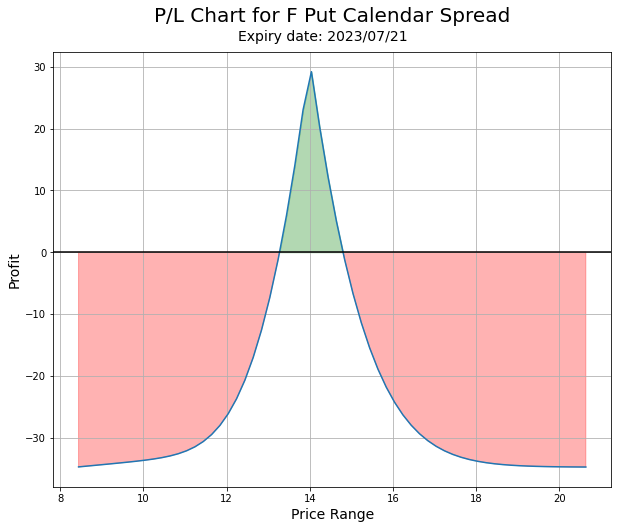

In [255]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 8))  # Increased size of the plot

# Plot data
ax.plot(pl_table['price_range'], pl_table['profit'], label='_nolegend_')  # Hide the legend for the line plot

# Add horizontal line at y=0
ax.axhline(0, color='black')

# Add shaded areas
profit_positive = pl_table['profit'] >= 0
profit_negative = pl_table['profit'] < 0

# Shading profit >= 0 region with light green
ax.fill_between(pl_table['price_range'], pl_table['profit'], 0, where=profit_positive, interpolate=True, color='green', alpha=0.3)

# Shading profit < 0 region with light red
ax.fill_between(pl_table['price_range'], pl_table['profit'], 0, where=profit_negative, interpolate=True, color='red', alpha=0.3)

# Set title and labels
ax.set_title(f"P/L Chart for {tickerSymbol} {strategy}", fontsize=20, pad=30)  # Increased font size and pad
ax.set_xlabel("Price Range", fontsize=14)  # Increased font size
ax.set_ylabel("Profit", fontsize=14)  # Increased font size

# Add subtitle
formatted_expiry_date = expiry_date.strftime('%Y/%m/%d')  # Format the expiry_date to 'YYYY/MM/DD'
plt.figtext(0.5, 0.9, f"Expiry date: {formatted_expiry_date}", ha="center", fontsize=14)  # Centered subtitle with formatted date

ax.grid()

# Display the plot
plt.show()
